## SYMPTOM BASED DISEASE DIAGNOSIS MODEL USING KNN
### STEP 1:  IMPORTING LIBRARIES (necessary)

In [2]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

## STEP 2: DATASET LOADING AND EXPLORATION
##### The dataset comprises of 4 columns and 1200 rows, the columns comprises of index, Disease, Symptom and Precaution. Each desease has 50 different symptoms.
##### Defining the Columns in the dataset

In [3]:
data_set = pd.read_csv('diseases.csv')
data_set.columns=[
    '',
    'Disease',
    'Symptoms',
    'Precaution'
]

##### Data exploration

In [4]:
data_set.head()

,,Disease,Symptoms,Precaution
0,1,Psoriasis,I have been experiencing a skin rash on my arm...,"To manage psoriasis, avoid triggers such as st..."
1,2,Psoriasis,"My skin has been peeling, especially on my kne...",NaN
2,3,Psoriasis,I have been experiencing joint pain in my fing...,NaN
3,4,Psoriasis,"There is a silver like dusting on my skin, esp...",NaN
4,5,Psoriasis,"My nails have small dents or pits in them, and...",NaN


In [5]:
data_set.tail()

,,Disease,Symptoms,Precaution
1195,1196,diabetes,I'm shaking and trembling all over. I've lost ...,NaN
1196,1197,diabetes,"Particularly in the crevices of my skin, I hav...",NaN
1197,1198,diabetes,I regularly experience these intense urges and...,NaN
1198,1199,diabetes,"I have trouble breathing, especially outside. ...",NaN
1199,1200,diabetes,I constantly sneeze and have a dry cough. My i...,NaN


In [6]:
data_set.dtypes

               int64
Disease       object
Symptoms      object
Precaution    object
dtype: object

## STEP 3 DATA Pre-processing
#### This step involves cleaning the dataset by removing the null and duplcate values found.

##### Checking for null values 

In [7]:
data_set.isnull().value_counts()

       Disease  Symptoms  Precaution
False  False    False     True          1176
                          False           24
Name: count, dtype: int64

### Null values found in Precautions column
#### Relpacing the null values with 0

In [23]:

data_set['Precaution'].fillna(0, inplace=True)
data_set.head()

,,Disease,Symptoms,Precaution
0,1,Psoriasis,I have been experiencing a skin rash on my arm...,"To manage psoriasis, avoid triggers such as st..."
1,2,Psoriasis,"My skin has been peeling, especially on my kne...",0
2,3,Psoriasis,I have been experiencing joint pain in my fing...,0
3,4,Psoriasis,"There is a silver like dusting on my skin, esp...",0
4,5,Psoriasis,"My nails have small dents or pits in them, and...",0


### Recheking for null values

In [9]:
data_set.isnull().value_counts()

       Disease  Symptoms  Precaution
False  False    False     False         1200
Name: count, dtype: int64

##### Checking for duplicates in the dataset - No duplicates found

In [10]:
data_set[data_set.duplicated()]

,,Disease,Symptoms,Precaution


## STEP 4: SPLITING THE DATASET
##### Split the data into features (X) and labels (y)

In [11]:
X = data_set['Symptoms']
y = data_set['Disease']

#### Split the data into training and testing sets
##### 80% of the data is used for training and 20% for testing
###### The "random_state = 42" ensures that each time you run the train_test_split function with the same input data (X and y), you will get the same output. 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

##### Use TfidfVectorizer to convert text data into numerical format

In [13]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

## STEP 5: TRAINING THE MODEL
##### Create a KNeighborsClassifier  

In [14]:
classifier = KNeighborsClassifier(5)

##### Fit the model on the training data

In [15]:
classifier.fit(X_train_vectorized, y_train)

KNeighborsClassifier()

##### Make Predictions on the test data

In [16]:
y_pred = classifier.predict(X_test_vectorized)

##### Fetch Precations for predicted disease

In [17]:
# Get the index of the predicted disease for each test instance
disease_indices = classifier.kneighbors(X_test_vectorized, n_neighbors=1, return_distance=False)

# Extract the corresponding precaution for each predicted disease
precautions = [data_set.loc[idx, 'Precaution'] for idx in disease_indices.flatten()]

# Combine the predictions and precautions into a DataFrame
results_df = pd.DataFrame({'Predicted Disease': y_pred, 'Precaution': precautions})

##### Evaluate the model

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9583333333333334
Classification Report:
                                  precision    recall  f1-score   support

                           Acne       0.88      1.00      0.93         7
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       1.00      1.00      1.00        11
           Cervical spondylosis       1.00      1.00      1.00         7
                    Chicken pox       0.85      0.92      0.88        12
                    Common Cold       1.00      1.00      1.00        12
                         Dengue       0.83      0.83      0.83        12
          Dimorphic Hemorrhoids       1.00      1.00      1.00         7
               Fungal infection       1.00      1.00      1.00        13
                   Hypertension       1.00      1.00      1.00        10
                       Impetigo       1.00      0.91      0.95        11
                       Jaundice       0.92      1.00      0.96        

## STEP 6: ANALYSING THE MODEL


##### Pie Chart for the Model Predictions Results

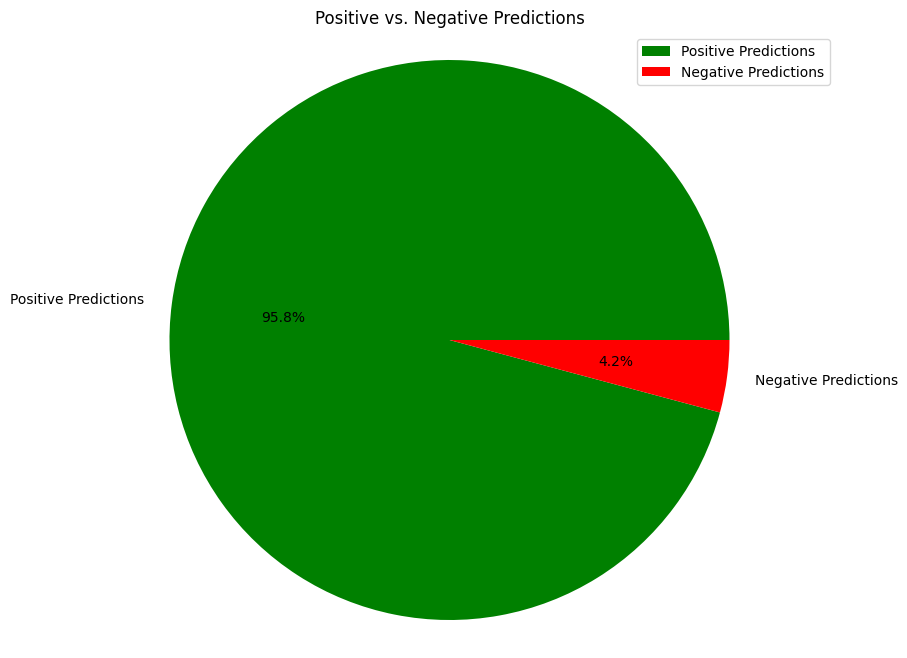

In [19]:
# Count the positive and negative predictions
total_samples = len(y_test)
positive_samples = np.sum(y_test == y_pred)
negative_samples = total_samples - positive_samples

# Create the pie chart
labels = ['Positive Predictions', 'Negative Predictions']
sizes = [positive_samples, negative_samples]
colors = ['green', 'red']

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Positive vs. Negative Predictions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is circular.
plt.legend(loc = "upper right")
plt.show()

##### Receiver Operating Characteristic (ROC_CURVE)

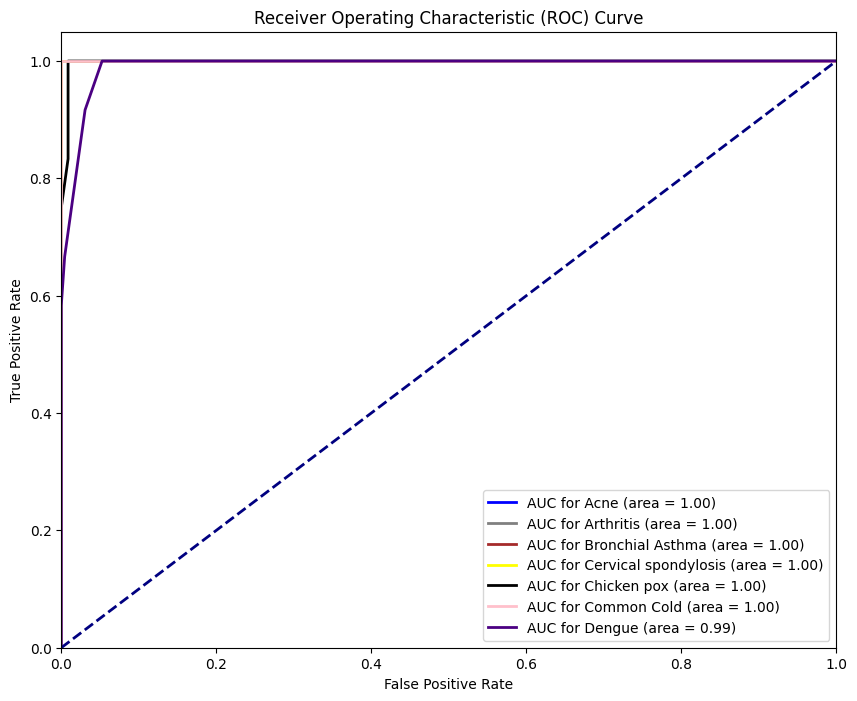

In [20]:
# Binarize the target variable
y_test_bin = label_binarize(y_test, classes=classifier.classes_)

# Get the probabilities for each class
y_pred_proba = classifier.predict_proba(X_test_vectorized)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classifier.classes_)):
    fpr[i], tpr[i], threshhold = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class, in this case only seven classes were given specific colors
plt.figure(figsize=(10, 8))
colors = ['blue', 'gray', 'brown', 'yellow', 'black', 'pink', 'indigo']
for i, color in zip(range(len(classifier.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='AUC for {} (area = {:.2f})'.format(classifier.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Confusion Matrix

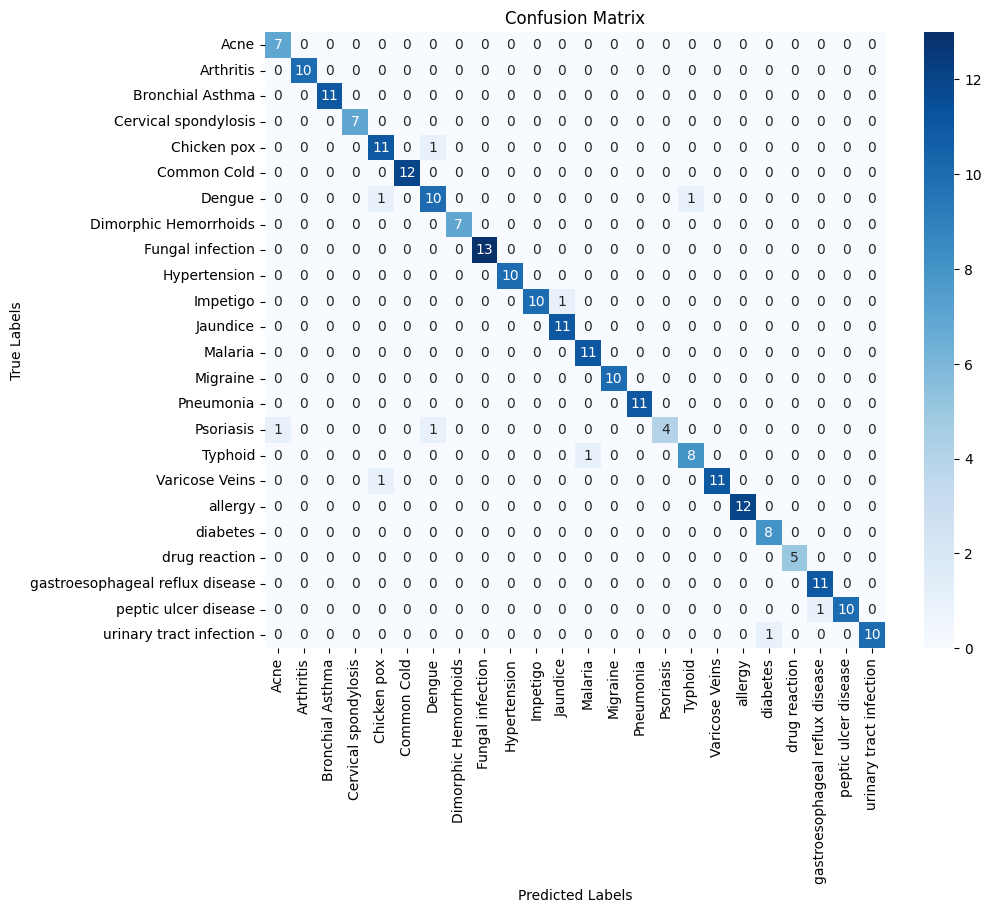

In [21]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## STEP 7 SAVING THE MODEL
### Save the model as .pkl file

In [22]:
model = joblib.dump(classifier, 'model.pkl')
vectorizer = joblib.dump(vectorizer, 'vectorizer.pkl')